In [1]:
import localgraphclustering as lgc

import time
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt

# Memory and time efficient loading of graphs. Memory and time grows linearly w.r.t the number of edges.

In [2]:
# Download this dataset from http://snap.stanford.edu/data/com-Orkut.html
# This dataset has 3,072,441 nodes and 117,185,083 edges.
# Loading this graph requires about 9GB of memory and 140 seconds on Macbook Pro 2016 with
# 2.9 GHz Intel Core i7, 16GB 2133 MHz LPDD3.
start = time.time()
g = lgc.GraphLocal('/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist','edgelist','\t')
end = time.time()
print("running time:",str(end-start)+"s")

running time: 168.44892382621765s


# The routines below are applicable for scalable local graph clustering analytics; low memory requirements and fast running time. The memory and running time requirements are of the order of the volume of target cluster instead of the order of the volume of the graph.

# Call Approximate PageRank

In [3]:
start = time.time()

reference_node = 3215

# Find an approximate PageRank vector by calling a C++ code.
output_pr_fast = lgc.approximate_PageRank(g,[reference_node],cpp = True)

end = time.time()
print("running time:",str(end-start)+"s")

running time: 0.11284518241882324s


# Round the output of Approximate PageRank

In [4]:
start = time.time()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = lgc.sweep_cut(g,output_pr_fast,cpp = True)

end = time.time()
print("running time:",str(end-start)+"s")

running time: 0.6567678451538086s


# Memory efficient NCP

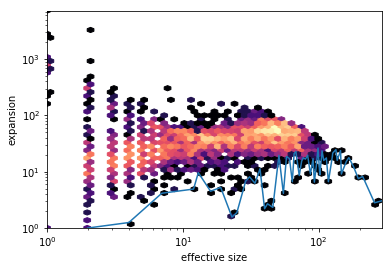

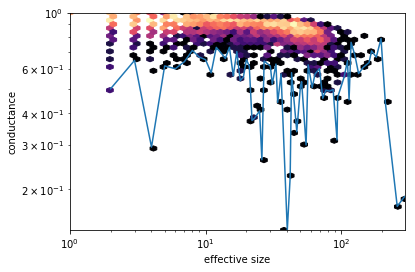

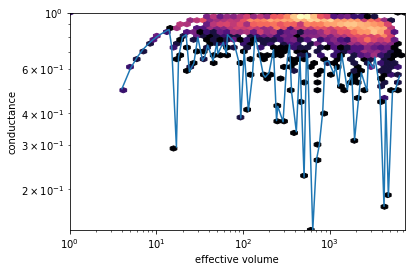

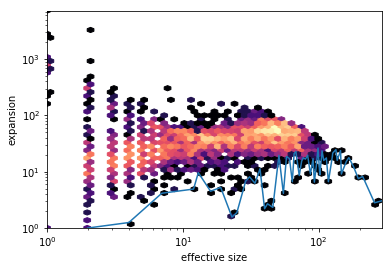

running time: 2.6162631511688232s


In [9]:
start = time.time()

ncp_instance = lgc.NCPData(g,do_largest_component=False)
ncp_instance.approxPageRank(ratio=0.5,timeout=7200)
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax, mintuples = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, mintuples = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, mintuples = ncp_plots.isop_by_size()
plt.show()

end = time.time()
print("running time:",str(end-start)+"s")

# Compute the Network Community Profile of the largest component of the graph.

In [ ]:
# The code below will compute the NCP for the largest connected component of the graph.
# To compute the largest component the memory requirements are being doubled, i.e., two times
# the size of the graph object in line 2 above.
start = time.time()

ncp_instance = lgc.NCPData(g,do_largest_component=True)
ncp_instance.approxPageRank(ratio=0.5,timeout=7200)
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()

end = time.time()
print("running time:",str(end-start)+"s")

# Call L1-regularized PageRank

In [ ]:
start = time.time()

reference_node = 3215

# Find an approximate PageRank vector by calling a C++ code.
output_l1reg_fast = lgc.approximate_PageRank(g,[reference_node],method = "l1reg",cpp = True)

end = time.time()
print("running time:",str(end-start)+"s")

# Round the output of L1-regularizedPageRank

In [ ]:
start = time.time()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = lgc.sweep_cut(g,output_l1reg_fast,cpp = True)

end = time.time()
print("running time:",str(end-start)+"s")

# Memory efficient NCP based on L1-regularized PageRank

In [ ]:
# The code below will compute the NCP of graph and not the NCP of the largest connected component.
# The code below does not double the memory requirements.

start = time.time()

ncp_instance = lgc.NCPData(g,do_largest_component=True)
ncp_instance.approxPageRank(ratio=0.5,timeout=7200)
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax = ncp_plots.isop_by_size()
plt.show()
end = time.time()
print("running time:",str(end-start)+"s")

end = time.time()
print("running time:",str(end-start)+"s")

# More to come. We will have scalable implementations for l1-regularized PageRank and Capacity Releasing Diffusion soon.